# What Makes a Successful Horror Film?
Group-1: Xiaofan Fan, Tianyu Li, Wenxin Zhang

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## File Reading and Data Cleaning
FILE DESCRIPTION HERE!!!!!!!!!!!!

In [126]:
# READ FILES

## 1. Film Release Year & Rating
People often think that most top-rated horror movies are the classic old movies. So, for the first part, we want to figure out whether old horror movies are better than modern horror movies.

In [127]:
mainpage = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/mainpage.csv")
ranking = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/ranking.csv")
allrate = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/allrate.csv")

In [156]:
main_rank = pd.merge(ranking, mainpage, on = ["Name", "Year"])

### 1.1. Film Release Trend by Year
show the number of horror movies for each year with a bar chart to get a brief understanding about the trend

Text(0, 0.5, 'Counts of Horror Films')

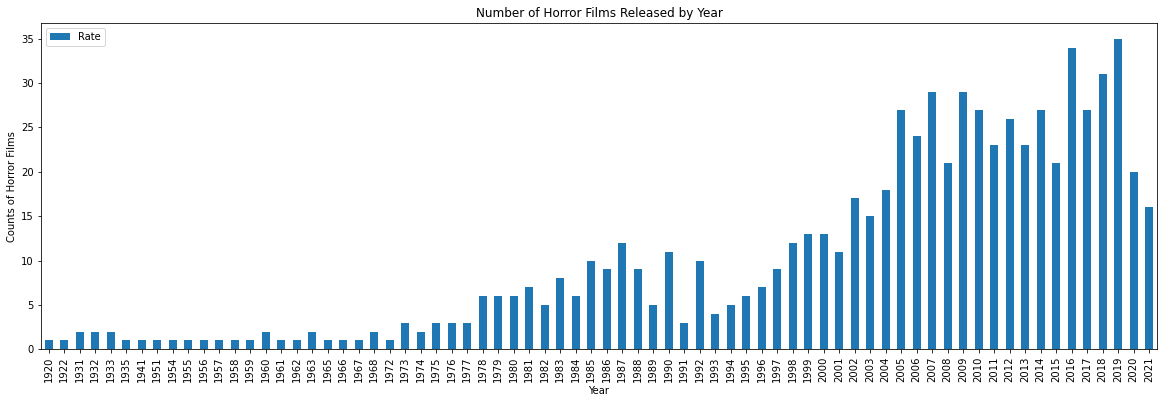

In [130]:
release_count = main_rank[["Year", "Rate"]].groupby(['Year']).count()
release_count_plot = release_count.plot(
    title = "Number of Horror Films Released by Year",
    kind = 'bar',
    figsize = (20,6) # adjust graph size
    )
release_count_plot.set_ylabel("Counts of Horror Films")

### 1.2. Film Rating Trend by Year
by using the scatter plot with release year on the horizontal axis and rating scores on the vertical axis, we will add the best fit line as the rating trend of all horror movies over time

In [132]:
# release_rate = main_rank[["Year", "Rate"]].groupby(['Year']).mean()
# # release_rate.head()
# release_rate_plot = release_rate.reset_index().plot(
#     x = 'Year',
#     y = 'Rate',
#     kind = 'scatter'
# )

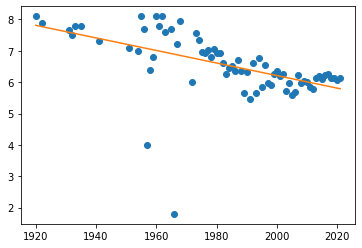

In [133]:
# Using Matplot and NumpyArray
release_rate = main_rank[["Year", "Rate"]].groupby(['Year']).mean()
x = np.array(release_rate.reset_index()['Year'])
y = np.array(release_rate.reset_index()['Rate'])
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)

#####改成折线图！！！或者不用groupby

#### 1.2.? 热力图

## 2. Genre & Rating


### 2.1. Proportion of Film by Genre
First, we will count the total number of films of each genre, and create a pie chart to show their proportions (e.g. among all 723 films, 40% are drama, 30% are adventure, etc.).

In [ ]:
mainpage = pd.read_csv("/Users/Cindy/Documents/GitHub/horrorfilm/mainpage.csv")

In [ ]:
#convert string to list
def stringToList(string):
    listRes = list(string.split(","))
    return listRes

mainpage["Genre_list"] =mainpage.apply(lambda x : stringToList(x["Genre"]),axis=1)
mainpage.head()

,Name,Year,Rate,Genre,Country,Genre_list
0,Deep Red,1975,7.6,"Horror,Mystery,Thriller",Italy,"[Horror, Mystery, Thriller]"
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea,"[Horror, Mystery, Thriller]"
2,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States,"[Horror, Mystery, Thriller]"
3,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States,"[Drama, Horror, Sci-Fi]"
4,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada,"[Drama, Fantasy, Horror, Mystery]"


In [ ]:
#count the total number of films of each genre
a = pd.Series(np.concatenate(mainpage.Genre_list))
Genre_count = pd.DataFrame({"Frequency":a.value_counts()}).rename(index={"Horror":"Total Number"})
Genre_count["Propotion(%)"] =Genre_count["Frequency"]/Genre_count["Frequency"][0]*100
Genre_count= Genre_count.drop(index='Total Number')
Genre_count.head()

,Frequency,Propotion(%)
Thriller,439,60.136986
Mystery,270,36.986301
Drama,187,25.616438
Sci-Fi,178,24.383562
Fantasy,136,18.630137


### 2.1. Proportion of Genre
First, we will count the total number of films of each genre, and create a pie chart to show their proportions (e.g. among all 723 films, 40% are drama, 30% are adventure, etc.).

In [ ]:
x=list(Genre_count.head(5).index)
y=list(Genre_count['Frequency'].head(5))
label = list(round(Genre_count['Propotion(%)'].head(5),2))
label

[60.14, 36.99, 25.62, 24.38, 18.63]

Text(0.5, 1.0, 'Top 5 popular Subgenres of Horror Films')

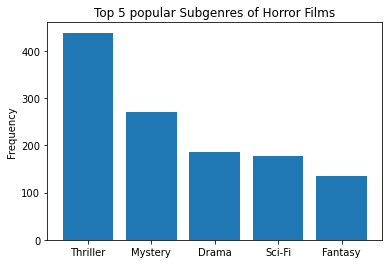

In [ ]:
fig, ax = plt.subplots(1,1)
ax.bar(x,y)
ax.set_ylabel('Frequency')
ax.set_title('Top 5 popular Subgenres of Horror Films')
# ax.annotate(
#             label,                      # Use `label` as label
#             (x, y),         # Place label at end of the bar
#             xytext=(0, 3),          # Vertically shift label by `space`
#             textcoords="offset points", # Interpret `xytext` as offset in points
#             ha='center')                # Horizontally center label) 


#autolabel(ax)

Text(0, 0.5, 'Propotion(%)')

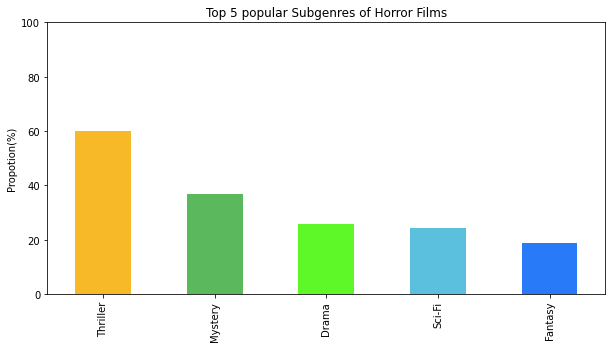

In [ ]:
colors_list = ['#F8B928','#5cb85c','#5EF828','#5bc0de','#287AF8','#d9534f']
Proportion_of_Genre = Genre_count["Propotion(%)"].head(5).plot(
    title = "Top 5 popular Subgenres of Horror Films",
    kind = 'bar',
    figsize = (10,5),
    ylim=(0, 100),
    color=colors_list
    )
Proportion_of_Genre.set_ylabel("Propotion(%)")

### 2.2. Ratings by Genre
Then, we will produce a bar chart with tags of film genres on the horizontal axis, and average user ratings on the vertical axis. This bar chart would show which genre is top rated by IMDb users.

### 2.3. Genre & Ranking
We plan to analyze the relationship between film genres and average ranking. For example, do drama horror movies rank higher than crime horror movies? 

## 3. Reviewer Portrait
We would like to summarize the characteristics of horror movie viewers and make a reviewer portrait. Our reviewer portrait will include the reviewers’ ages and genders.

### 3.1. Age

Due to reasons like film rating system, the scoring data of some movies by age group is missing, so only the data of 723 movies are analyzed.

In [ ]:
age_group = pd.read_csv('/Users/clairefan/Documents/GitHub/Project-imdb-JingyiFan4258/imdb/age_group_723.csv')
age_group.head()

,Movie,Year,Rate_All Ages,Rate_<18,Rate_18-29,Rate_30-44,Rate_45+,Number_All Ages,Number_<18,Number_18-29,Number_30-44,Number_45+
0,A Quiet Place,2018,7.5,7.6,7.6,7.4,7.4,489831,498,89041,154844,40616
1,Godzilla,1954,7.6,7.9,7.8,7.5,7.3,32428,32,4824,12546,6129
2,The Fly,1986,7.6,8.0,7.7,7.6,7.5,171639,58,17814,79829,30968
3,Psycho,1960,8.5,8.8,8.6,8.5,8.5,639113,371,101170,244362,90742
4,Deep Red,1975,7.6,7.4,7.7,7.6,7.4,36189,20,3991,16252,7145


To study horror movie reviewers of different age groups

#### 3.1.1. Reviewer Age Distribution
By using the bar chart, we can first demonstrate the age distribution of horror movie reviewers with age group on the horizontal axis and the corresponding counts on the vertical axis.

In [ ]:
age_group_number_sum = pd.DataFrame({"Number": age_group[['Number_<18','Number_18-29','Number_30-44','Number_45+']].sum(axis=0)})
age_group_number_sum = age_group_number_sum.rename(index={'Number_<18': "Age<18", 'Number_18-29': "18-29", 'Number_30-44': "30-44",'Number_45+':"Age>44"})
age_group_number_sum

,Number
Age<18,33096
18-29,9924324
30-44,31255041
Age>44,9039414


<AxesSubplot:title={'center':'Age Distribution of Reviewers'}, ylabel='Number'>

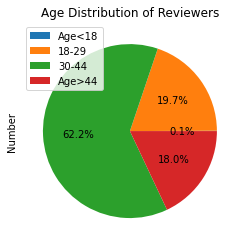

In [ ]:
age_group_number_sum.plot.pie(
    title = "Age Distribution of Reviewers",
    y = 'Number',
    figsize=(8,4),
    labels=None,
    autopct="%1.1f%%",
    )

#### 3.1.2. Rating Tendency by Age
Then we will use sub-bar plots to cross-analyze whether different age groups have different film-rating tendencies.

##### 3.1.2.1. Sub-bar Plot


Text(0.5, 0, 'Ratings')

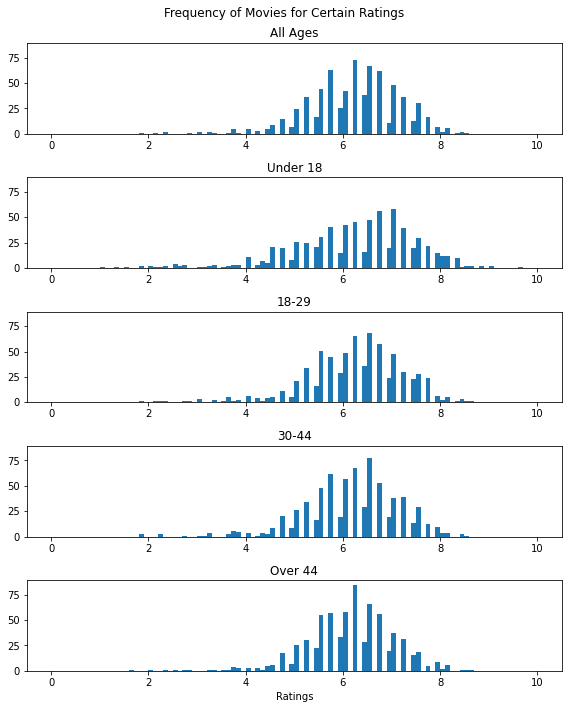

In [ ]:
fig, axs = plt.subplots(5, 1, sharey=True, tight_layout=True,figsize=(8, 10))
axs[0].hist(age_group['Rate_All Ages'],range = [0, 10],bins = 100,density = False)
axs[0].set_title('All Ages')
axs[1].hist(age_group['Rate_<18'],range = [0, 10],bins = 100,density = False)
axs[1].set_title('Under 18')
axs[2].hist(age_group['Rate_18-29'],range = [0, 10],bins = 100,density = False)
axs[2].set_title('18-29')
axs[3].hist(age_group['Rate_30-44'],range = [0, 10],bins = 100,density = False)
axs[3].set_title('30-44')
axs[4].hist(age_group['Rate_45+'],range = [0, 10],bins = 100,density = False)
axs[4].set_title('Over 44')
fig.suptitle('Frequency of Movies for Certain Ratings')
plt.xlabel("Ratings")


##### 3.1.2.2. Bar Chart
with different age groups on the horizontal axis and their mean ratings on the vertical axis


In [ ]:
age_group_number_mean = pd.DataFrame({"Average Rating": age_group[['Rate_All Ages','Rate_<18','Rate_18-29','Rate_30-44','Rate_45+']].mean(axis=0)})
age_group_number_mean = age_group_number_mean.rename(index={'Rate_All Ages':'All Ages','Rate_<18': "Rate<18", 'Rate_18-29': "18-29", 'Rate_30-44': "30-44",'Rate_45+':"Age>44"})
age_group_number_mean

,Average Rating
All Ages,6.205394
Rate<18,6.205256
18-29,6.248548
30-44,6.167635
Age>44,6.142877


(6.0, 6.3)

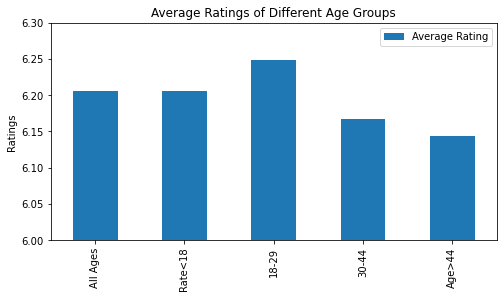

In [ ]:
age_group_number_mean.plot(
    title = "Average Ratings of Different Age Groups",
    kind = 'bar',
    figsize = (8,4),
    ).set_ylabel("Ratings")
plt.ylim([6,6.3])

### 3.2. Gender

In [ ]:
male = pd.read_csv('/Users/clairefan/Documents/GitHub/Project-imdb-JingyiFan4258/imdb/malespider.csv')
female = pd.read_csv('/Users/clairefan/Documents/GitHub/Project-imdb-JingyiFan4258/imdb/femalespider.csv')
all_rate = pd.read_csv('/Users/clairefan/Documents/GitHub/Project-imdb-JingyiFan4258/imdb/allrate.csv')
all_rate.head()
#female.head()

,Name,Year,Rating,User_Type,vote10,vote9,vote8,vote7,vote6,vote5,vote4,vote3,vote2,vote1
0,The Lighthouse,2019,7.5,IMDb Users,21413,29629,48256,37827,18885,9223,4841,3132,2268,3743
1,A Quiet Place,2018,7.5,IMDb Users,54103,75677,152430,118066,47978,18678,8604,5048,3367,5649
2,The Conjuring,2013,7.5,IMDb Users,61822,70986,145724,120266,48014,17467,7025,3644,2187,3614
3,American Psycho,2000,7.6,IMDb Users,62803,84728,168004,131072,51486,19245,8347,4427,2934,4419
4,Psycho,1960,8.5,IMDb Users,154176,178106,173392,81863,26755,10529,4706,2575,1848,4906


#### 3.2.1. Reviewer Gender Ratio
First, we want to use a pie chart to show the gender ratio of horror movie reviewers.

In [ ]:
gender_ratio = pd.DataFrame({"Number": [female['Number_Female'].sum(axis=0),male['Number_Male'].sum(axis=0)]},
                            index=['Female','Male'])
gender_ratio

,Number
Female,8764216
Male,43032012


<AxesSubplot:title={'center':'Gender Ratio of Reviewers'}, ylabel='Number'>

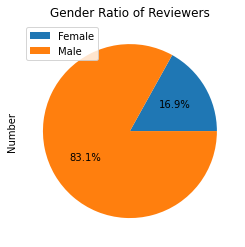

In [ ]:
gender_ratio.plot.pie(
    title = "Gender Ratio of Reviewers",
    y = 'Number',
    figsize=(8,4),
    labels=None,
    autopct="%1.1f%%",
    )

#### 3.2.2. Rating Tendency by Gender
Similarly, we will use bar plots to display the rating tendencies of each gender. 

##### 3.2.2.1. Sub-bar Plot 1(movie frequency)
like 3.1.2.1, value_count rate, rate_male and rate_female, y axis be proportion

##### 3.2.2.2. Sub-bar Plot 2(people number frequency)
like 3.1.2.1 but sum vote1~10 for male, female and all, y axis be proportion

##### 3.2.2.3. Bar Chart
with different genders on the horizontal axis and their mean ratings on the vertical axis


### 3.3. Reviewer Portrait of Genre Preference
To study which genre do people from each age group and of each gender prefer

#### 3.3.1. Age & Genre

#### 3.3.2. Gender & Genre

## 4. Which Country Produces the Most Good Horror Movies?
To analyze which country produces the most high-rated horror films, we will produce bar plots for each country to count the number of films by rating value. In each plot, the x-axis and y-axis will be film rating values and counts of films, respectively. The figures then could help us to answer questions such as whether the US produced more horror movies rated over 4 or below 3, or whether Germany released more low-rated movies than Japan.

In [134]:
mainpage = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/mainpage.csv")
mainpage.head()

,Name,Year,Rate,Genre,Country
0,Deep Red,1975,7.6,"Horror,Mystery,Thriller",Italy
1,The Wailing,2016,7.5,"Horror,Mystery,Thriller",South Korea
2,Psycho,1960,8.5,"Horror,Mystery,Thriller",United States
3,A Quiet Place,2018,7.5,"Drama,Horror,Sci-Fi",United States
4,The Lighthouse,2019,7.5,"Drama,Fantasy,Horror,Mystery",Canada


In [135]:
gb_country = mainpage[['Name', 'Country']].groupby('Country').count().sort_values(by='Name')
gb_country.tail(10)

,Name
Country,
South Korea,9
Italy,9
Australia,11
Japan,13
Spain,14
Germany,16
France,19
Canada,53
United Kingdom,65


<AxesSubplot:title={'center':'Top 5 Countries Released the Most Horror Films'}, xlabel='Country', ylabel='Total Film Released'>

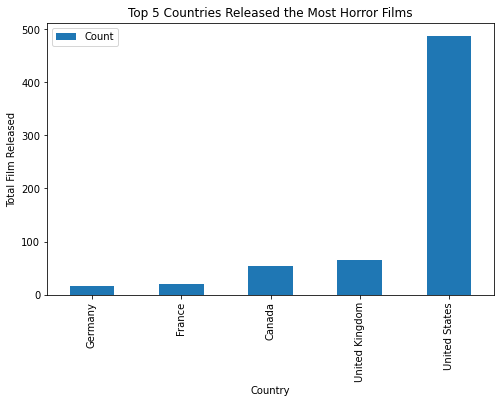

In [196]:
gb_country = mainpage[['Name', 'Country']].groupby('Country').count().sort_values(by='Name')
gb_country.reset_index().rename(columns={'Name' : 'Count'})[-5:].plot(
    x = 'Country',
    kind = 'bar',
    xlabel = 'Country',
    ylabel = 'Total Film Released',
    title = 'Top 5 Countries Released the Most Horror Films',
    figsize = (8,5)
)

<AxesSubplot:title={'center':'Proportion of Released Horror Films by Country'}, ylabel='Count'>

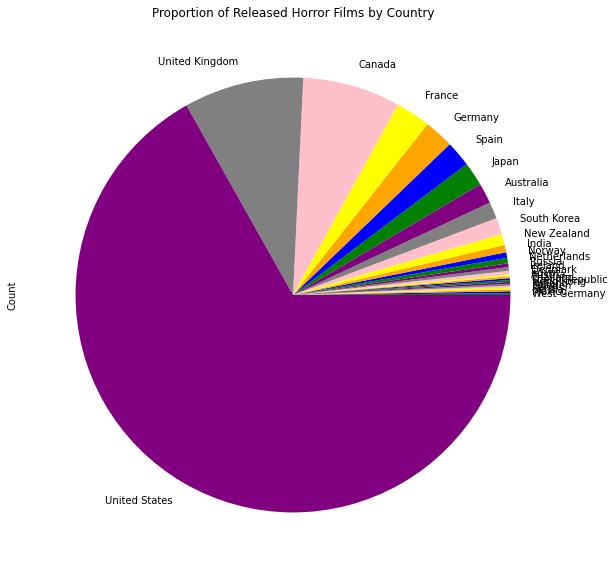

In [197]:
# pie chart: which country produces the highest fraction of horror films
# only shows tags for top 5 highest proportion
gb_country = mainpage[['Name', 'Country']].groupby('Country').count().sort_values(by='Name')
gb_country.reset_index().rename(columns={'Name' : 'Count'}).set_index('Country').plot(
    kind = 'pie',
    y = 'Count',
    legend = False,
    title = 'Proportion of Released Horror Films by Country',
    colors = ['green', 'blue', 'orange', 'yellow', 'pink', 'grey', 'purple'],
    figsize = (10,10)
    )

([<matplotlib.patches.Wedge at 0x7f9389e0a760>,
 [Text(1.0999898137092685, 0.004733892251518024, 'Country'),
  Text(1.0999083245153451, 0.014201326059430457, 'Name')])

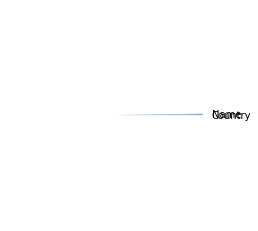

In [190]:
labels = gb_country.reset_index()
sizes = gb_country.reset_index().rename(columns={'Name' : 'Count'})['Count']
colours = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
plt.pie(sizes,
          labels=labels,
          colors=[colours[key] for key in labels]
          )

In [186]:
gb_country

,Name
Country,
West Germany,1
Mexico,1
Serbia,1
Peru,1
Sweden,1
Finland,1
Hong Kong,1
Czech Republic,1
Thailand,1


<AxesSubplot:ylabel='Count'>

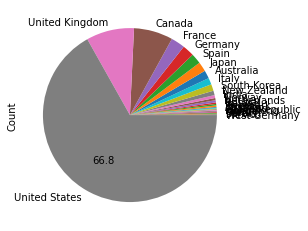

In [138]:
from matplotlib import pyplot as plt
gb_country.reset_index().rename(columns={'Name' : 'Count'}).set_index('Country').plot.pie(
    y = 'Count',
    legend = False,
    autopct=lambda p: format(p, '.1f') if p > 10 else None
    )

Here, we plot the top 5 countries that produces the most films: the United States, the United Kingdom, Canada, France, and Germany.

### 1. The United States

<AxesSubplot:ylabel='Density'>

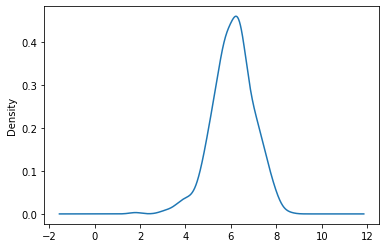

In [139]:
# US = mainpage.query('Country == "United States"')#[['Rate', 'Country']].groupby('Rate').count().reset_index().rename(columns = {'Country' : 'Count'})
# US['Rate'].plot.kde()

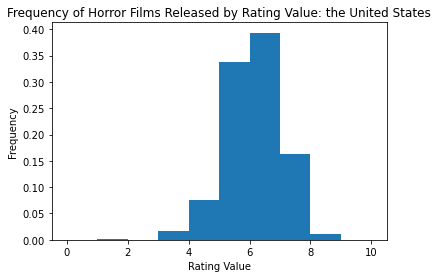

In [224]:
fig, ax = plt.subplots(1, 1)
ax.hist(mainpage.query('Country == "United States"')['Rate'], range = [0, 10],bins = 10,density = True)
ax.set_title("Frequency of Horror Films Released by Rating Value: the United States")
ax.set_xlabel('Rating Value')
ax.set_ylabel('Frequency')
plt.show()


# # Make some labels.
# rects = ax.patches
# labels = ["label%d" % i for i in range(len(rects))]
  
# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
#             ha='center', va='bottom')




In [252]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # # If value of bar is negative: Place label below bar
        # if y_value < 0:
        #     # Invert space to place label below
        #     space *= -1
        #     # Vertically align label at top
        #     va = 'top'

        # If value of bar is greater than 0.5: Adjust label location
        if y_value > 0.5:
            space = spacing - 20
            # Vertically align label at top
            va = 'bottom'

        # Use Y value as label and format number with one decimal place, if Y is positive (nonzero)
        label = "{:.2f}".format(y_value) if y_value >0 else None ######### 改成百分号显示

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.



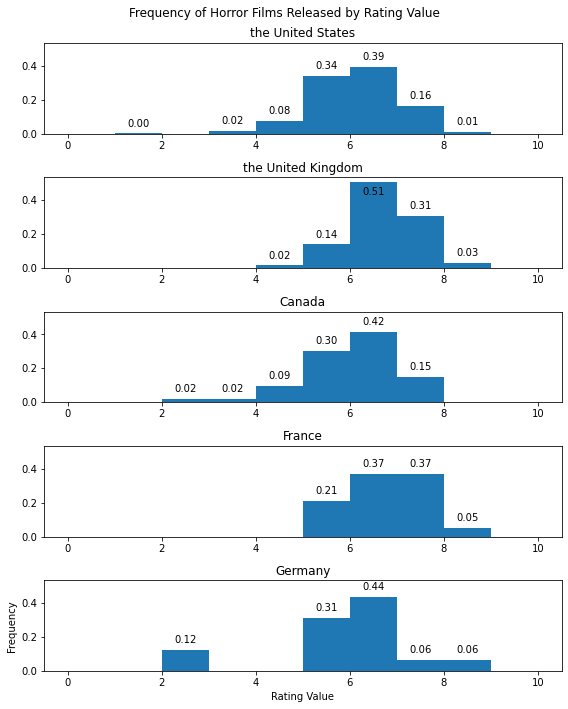

In [254]:
fig, ax = plt.subplots(5, 1, sharey=True, tight_layout=True,figsize=(8, 10))
fig.suptitle('Frequency of Horror Films Released by Rating Value')
plt.xlabel("Rating Value")
plt.ylabel("Frequency")

# 1. US
ax[0].hist(mainpage.query('Country == "United States"')['Rate'], range = [0, 10],bins = 10, density = True)
ax[0].set_title("the United States")
add_value_labels(ax[0])


# 2. UK
ax[1].hist(mainpage.query('Country == "United Kingdom"')['Rate'], range = [0, 10],bins = 10, density = True)
ax[1].set_title("the United Kingdom")
add_value_labels(ax[1])

# 3. Canada
ax[2].hist(mainpage.query('Country == "Canada"')['Rate'], range = [0, 10],bins = 10, density = True)
ax[2].set_title("Canada")
add_value_labels(ax[2])

# 4. France
ax[3].hist(mainpage.query('Country == "France"')['Rate'], range = [0, 10],bins = 10, density = True)
ax[3].set_title("France")
add_value_labels(ax[3])

# 5. Germany
ax[4].hist(mainpage.query('Country == "Germany"')['Rate'], range = [0, 10],bins = 10, density = True)
ax[4].set_title("Germany")
add_value_labels(ax[4])

## 5. Budge and Box Office


### 5.1. Are the Most Profitable Films Also Highest-Rated?
1. Calulate "Revenue"
2. find top 20 films with highest revenue
3. compare with 20 top rated films

We want to obtain the difference between gross worldwide box office and budget (“revenue”) of the 723 movies, find the 20 movies with the highest revenue, and compare them with the 20 highest rated movies to analyze the relationship between the revenue and ratings. 

In [150]:
budget_read = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/budget.csv")
ranking = pd.read_csv("/Users/Annie/Documents/GitHub/horror_film/ranking.csv")

In [155]:
budget = pd.merge(budget_read, ranking, on=['Name', 'Year'])
budget['Revenue'] = budget['Gross Worldwide'] - budget['Budget']
budget = budget.rename(columns={"Rank" : "Rank by Rating"}).sort_values(by = 'Revenue', ascending = False).set_index("Name").reset_index()
budget["Rank by Revenue"] = budget.index + 1
budget[['Name', 'Year', 'Rank by Rating', 'Rank by Revenue', 'Rate', 'Revenue']].set_index("Rank by Revenue").head(10)

,Name,Year,Rank by Rating,Rate,Revenue
Rank by Revenue,,,,,
1,It,2017,83,7.3,666796444
2,Hotel Transylvania 3: Summer Vacation,2018,346,6.3,448583774
3,The Exorcist,1973,11,8.0,430306145
4,The Meg,2018,548,5.6,400438278
5,Hotel Transylvania 2,2015,210,6.7,395186706
6,It Chapter Two,2019,266,6.5,394093228
7,World War Z,2013,149,7.0,350455876
8,The Nun,2018,609,5.3,343551694
9,A Quiet Place,2018,47,7.5,323952971


### 5.2. Which Genre Is The Most Profitable?
We will also cross-analyze the ranking based on revenue with the movies genre to see what type of horror movies people prefer to go to the movie theater.

In [149]:
#convert string to list
def stringToList(string):
    listRes = list(string.split(","))
    return listRes

budget["Genre_list"] =budget.apply(lambda x : stringToList(x["Genre"]),axis=1)
budget.head()

,Name,Year,Rate,Genre,Country,Budget,Gross Worldwide,Rank by Rating,Revenue,Rank by Revenue,Genre_list
0,It,2017,7.3,Horror,United States,35000000,701796444,83,666796444,1,[Horror]
1,Hotel Transylvania 3: Summer Vacation,2018,6.3,"Animation,Adventure,Comedy,Family,Fantasy,Horror",United States,80000000,528583774,346,448583774,2,"[Animation, Adventure, Comedy, Family, Fantasy..."
2,The Exorcist,1973,8.0,Horror,United States,11000000,441306145,11,430306145,3,[Horror]
3,The Meg,2018,5.6,"Action,Horror,Sci-Fi,Thriller",United States,130000000,530438278,548,400438278,4,"[Action, Horror, Sci-Fi, Thriller]"
4,Hotel Transylvania 2,2015,6.7,"Animation,Adventure,Comedy,Family,Fantasy,Horror",United States,80000000,475186706,210,395186706,5,"[Animation, Adventure, Comedy, Family, Fantasy..."
